In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
nw=pd.read_csv("/content/NewspaperData.csv")
nw

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [4]:
nw=nw[["daily","sunday"]]
nw

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [5]:
nw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   daily   34 non-null     float64
 1   sunday  34 non-null     float64
dtypes: float64(2)
memory usage: 672.0 bytes


# **Correlation Analysis**

<Axes: xlabel='daily', ylabel='sunday'>

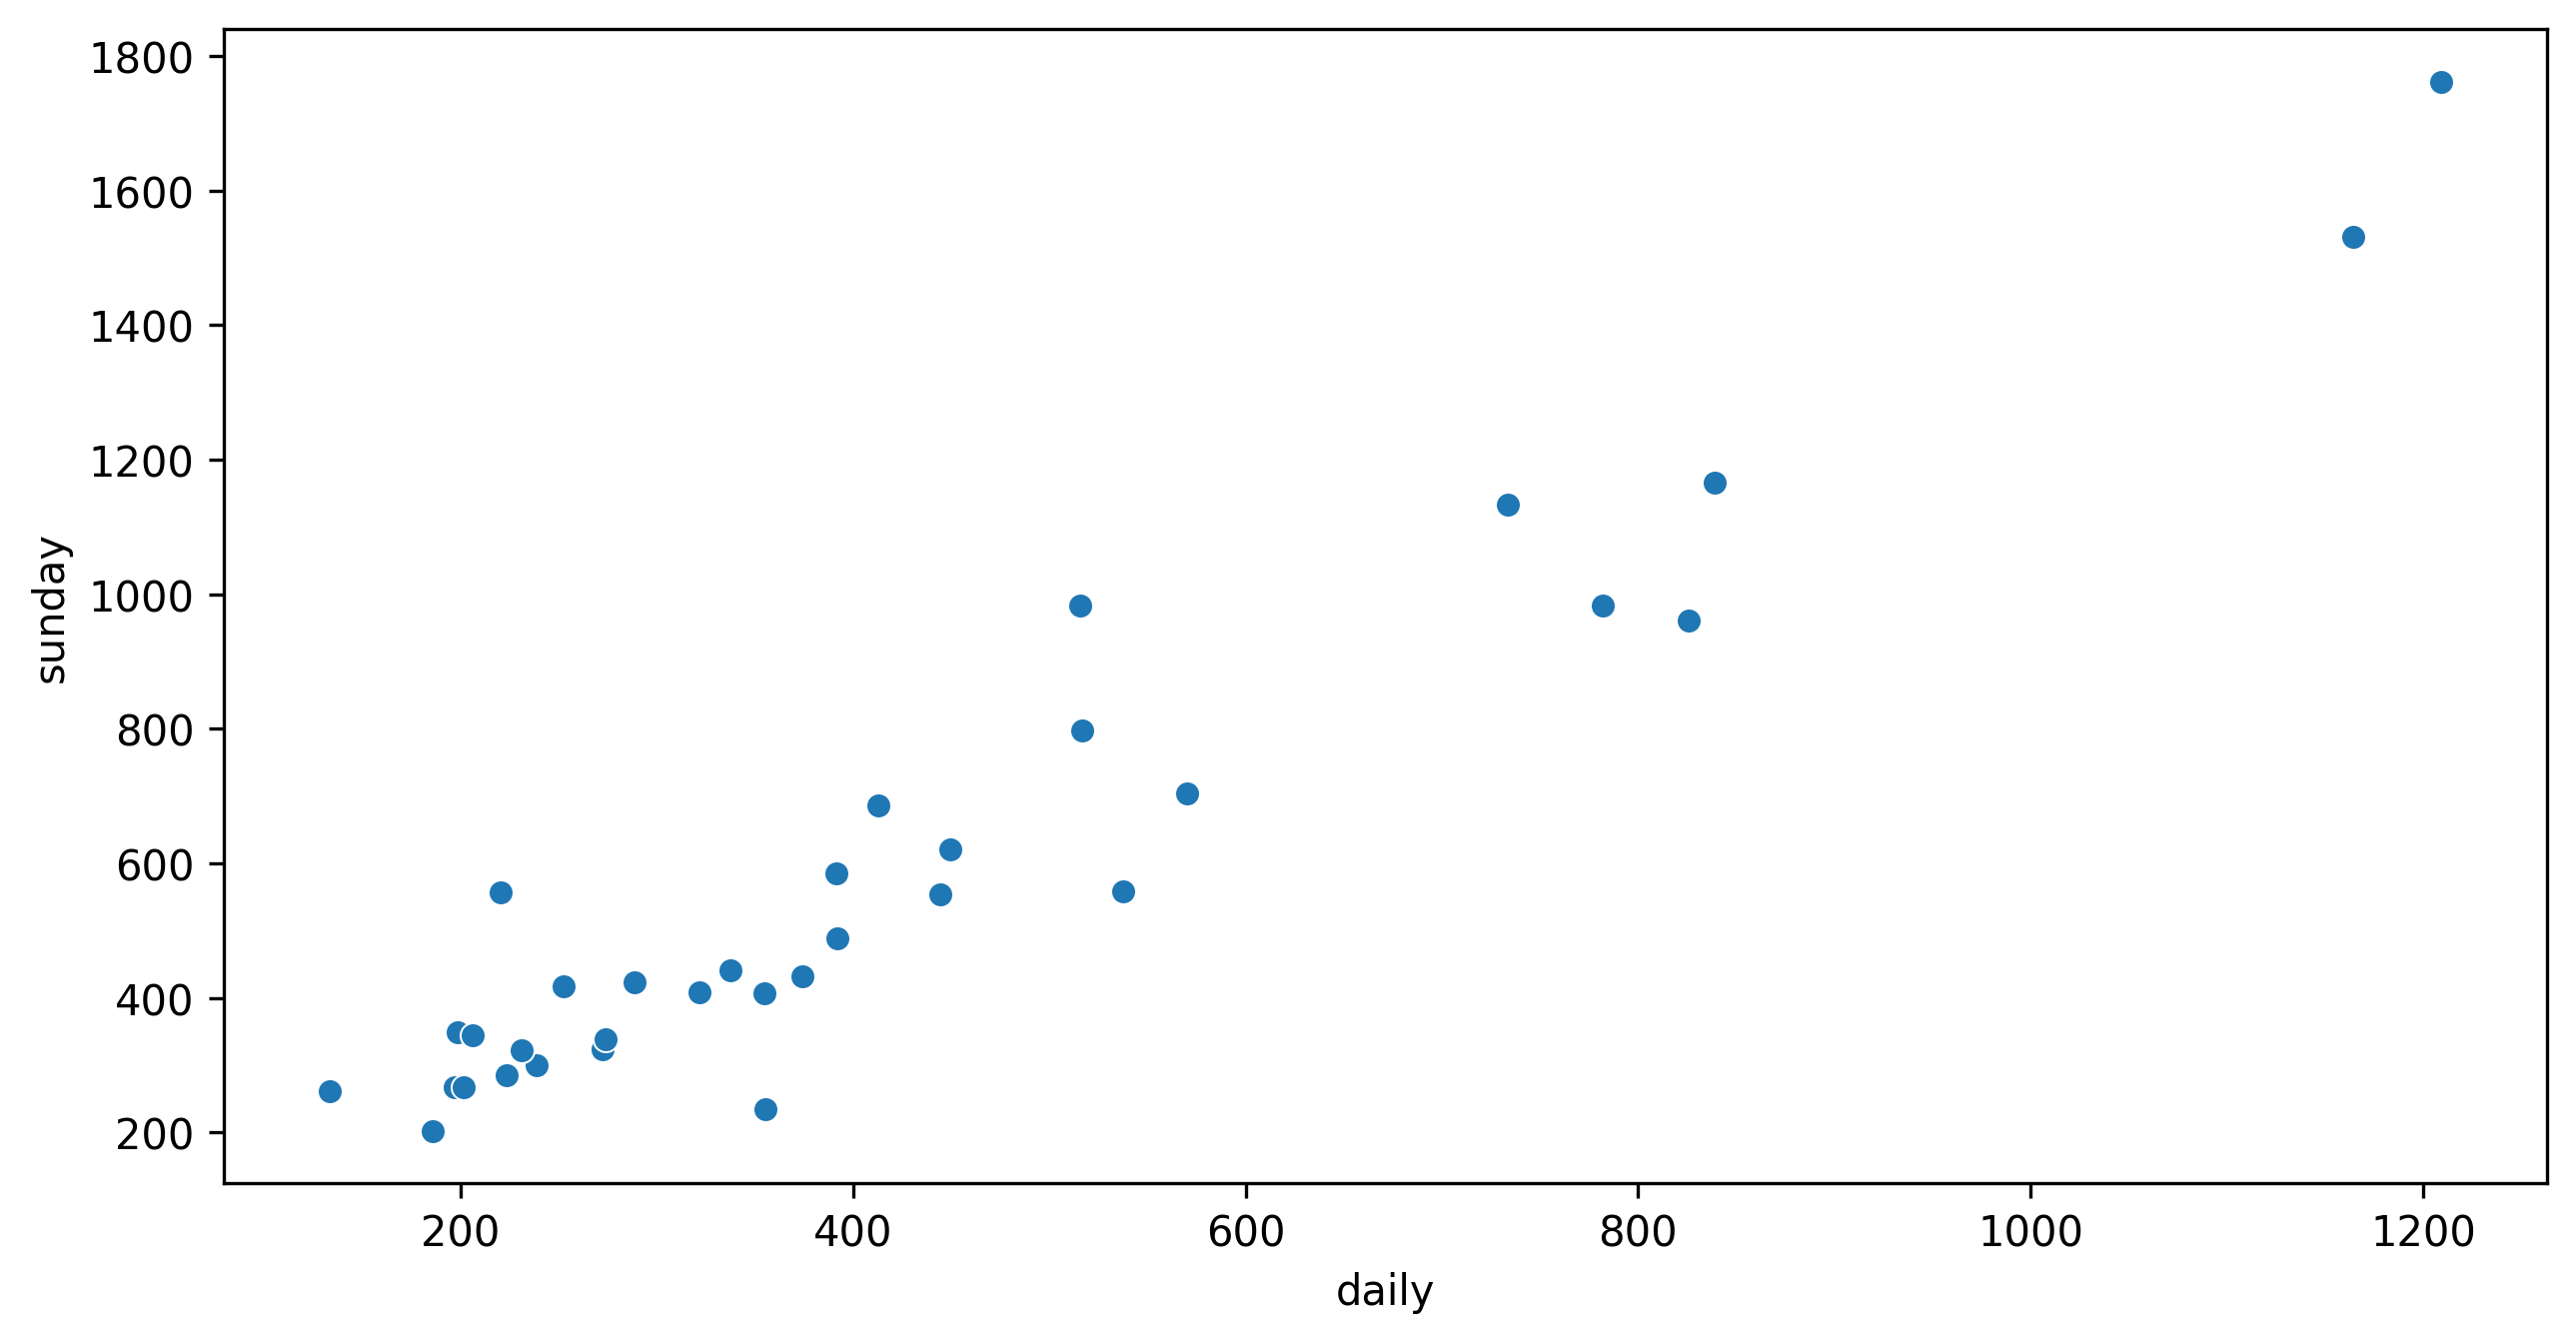

In [6]:
sns.scatterplot(x=nw['daily'],y=nw['sunday'])

In [7]:
nw.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: >

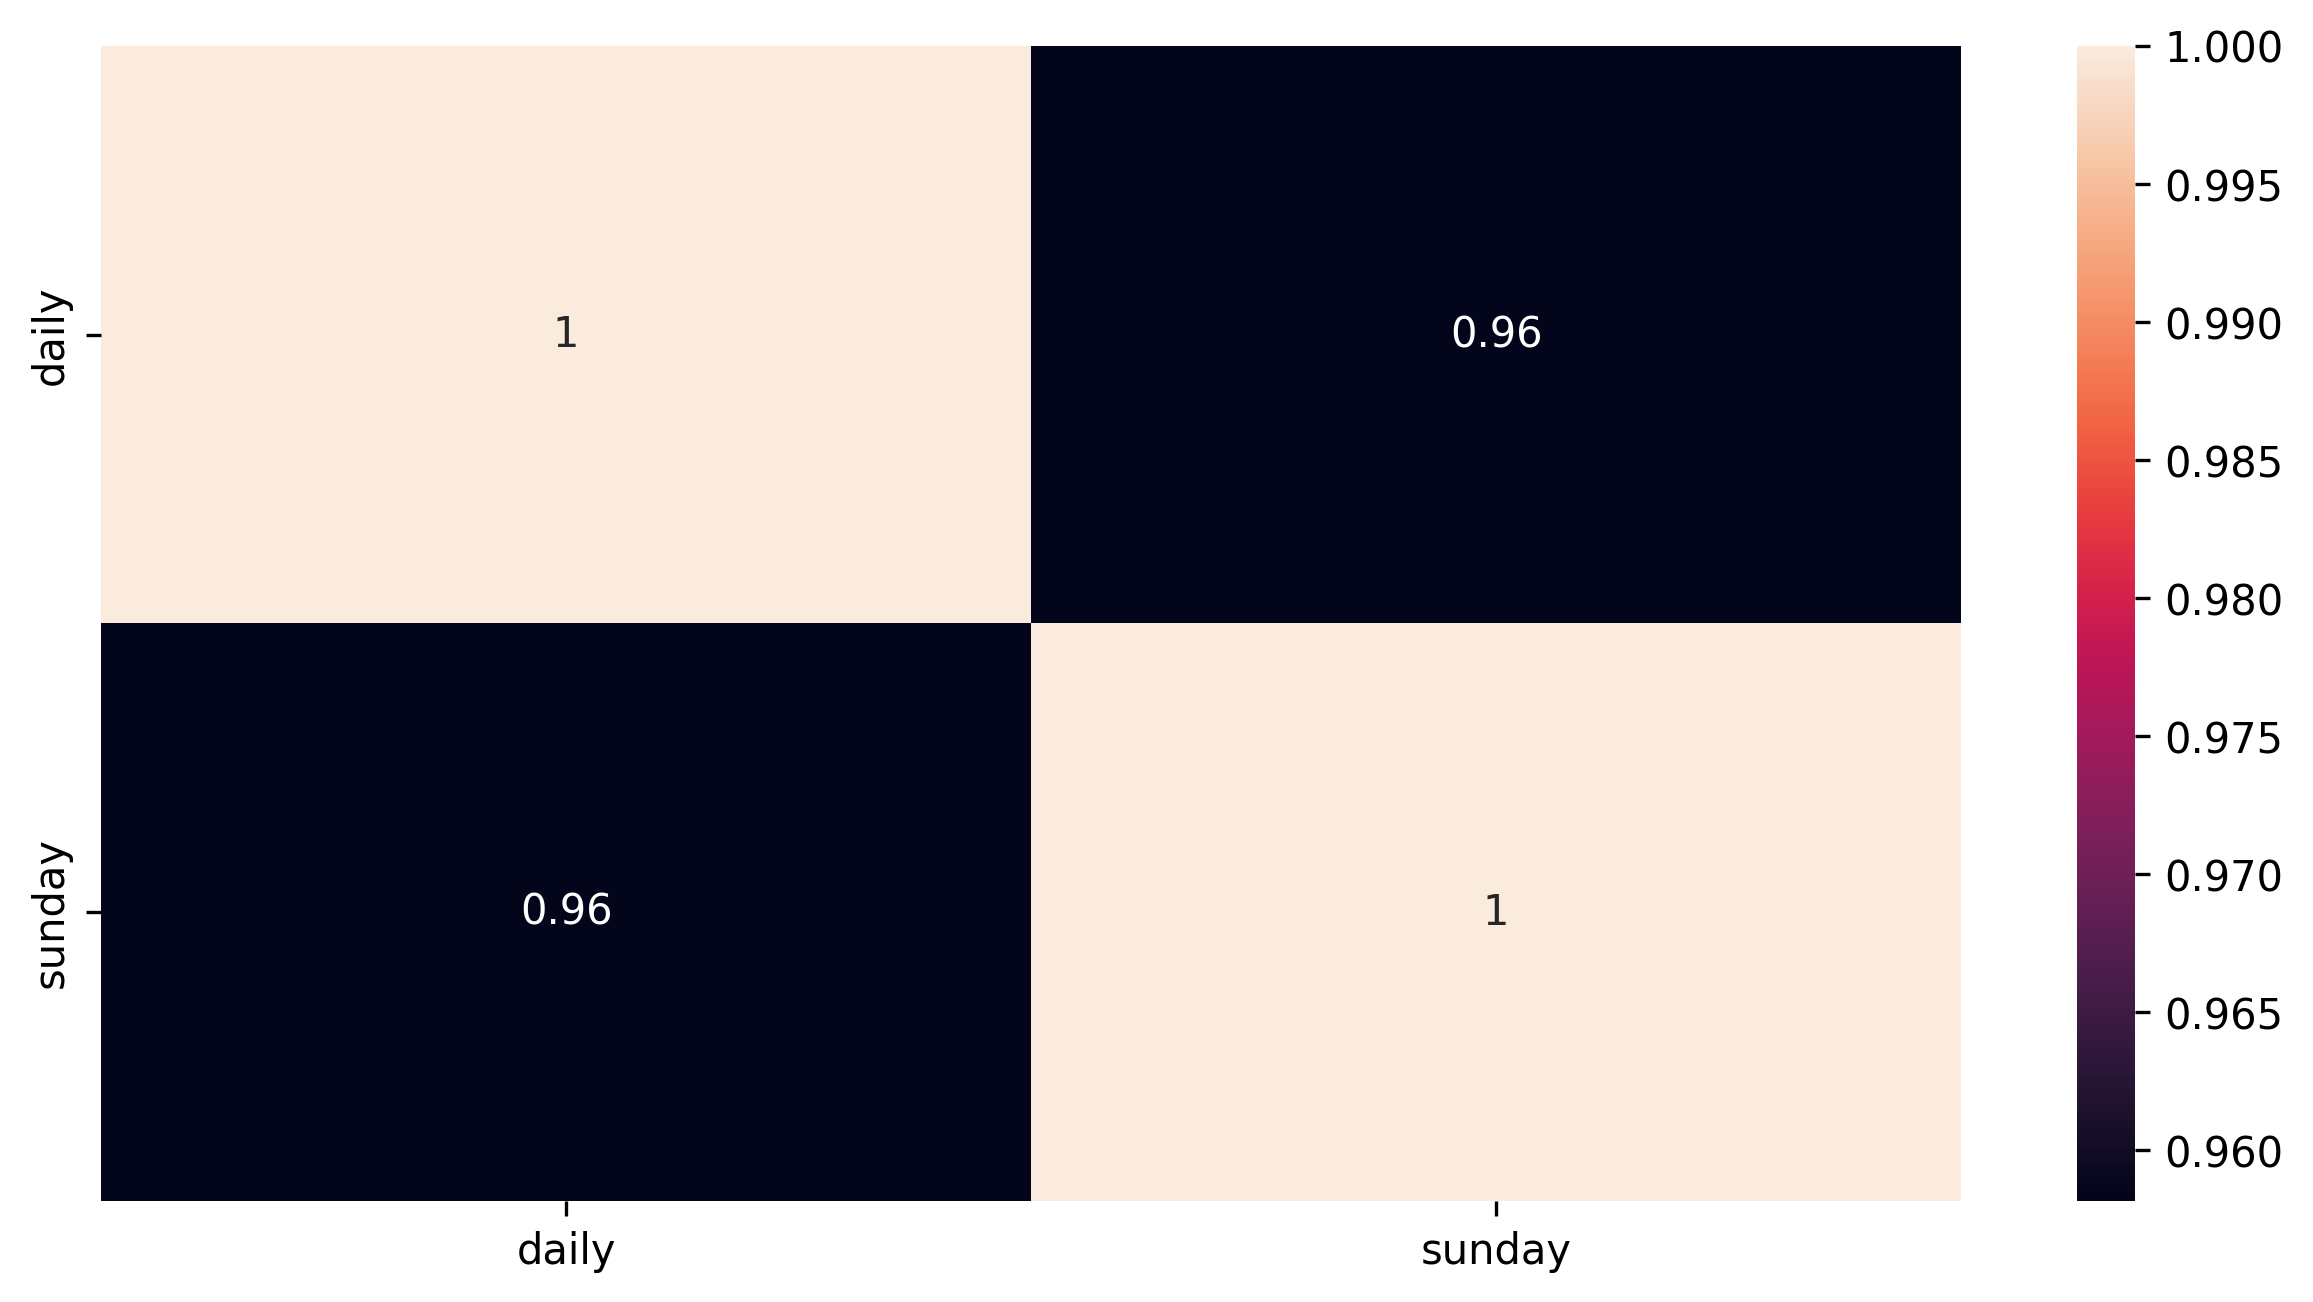

In [8]:
sns.heatmap(nw.corr(),annot=True)

# **Fitting a Linear regression model**

In [9]:
# statsmodel library is used for multiple purposes like statistical calculations, hypothesis testing,linear regression etc
import statsmodels.formula.api as smf
#model -regression model,"y~x"
model=smf.ols("sunday~daily",data=nw).fit()
# ordinary least squares, y dep. variable-sunday,then give ~symbol then give x indep.variable-daily finally give
#dataset-data,fit()-fit the regression line



In [10]:
#coeffitients are c or B0 and m or B1
model.params
#reg. equan: sunday = B0+B1*daily
# in-output: intercept(i.e, best fit line is interssecting y axis at 13.83)- B0, daily-coeefitient of daily i.e B1=m=1.33
#c=13.33
#m=1.33
#sunday=13.83+1.33*daily
#we assumed daily circulation as 200
#so sunday= 13.83+1.33*200

,0
Intercept,13.835630
daily,1.339715


In [11]:
sunday=13.83+1.33*200
sunday

279.83

In [12]:
#R squared values -0.92 good regr equation
model.rsquared

0.9180596895873295

<Axes: xlabel='daily', ylabel='sunday'>

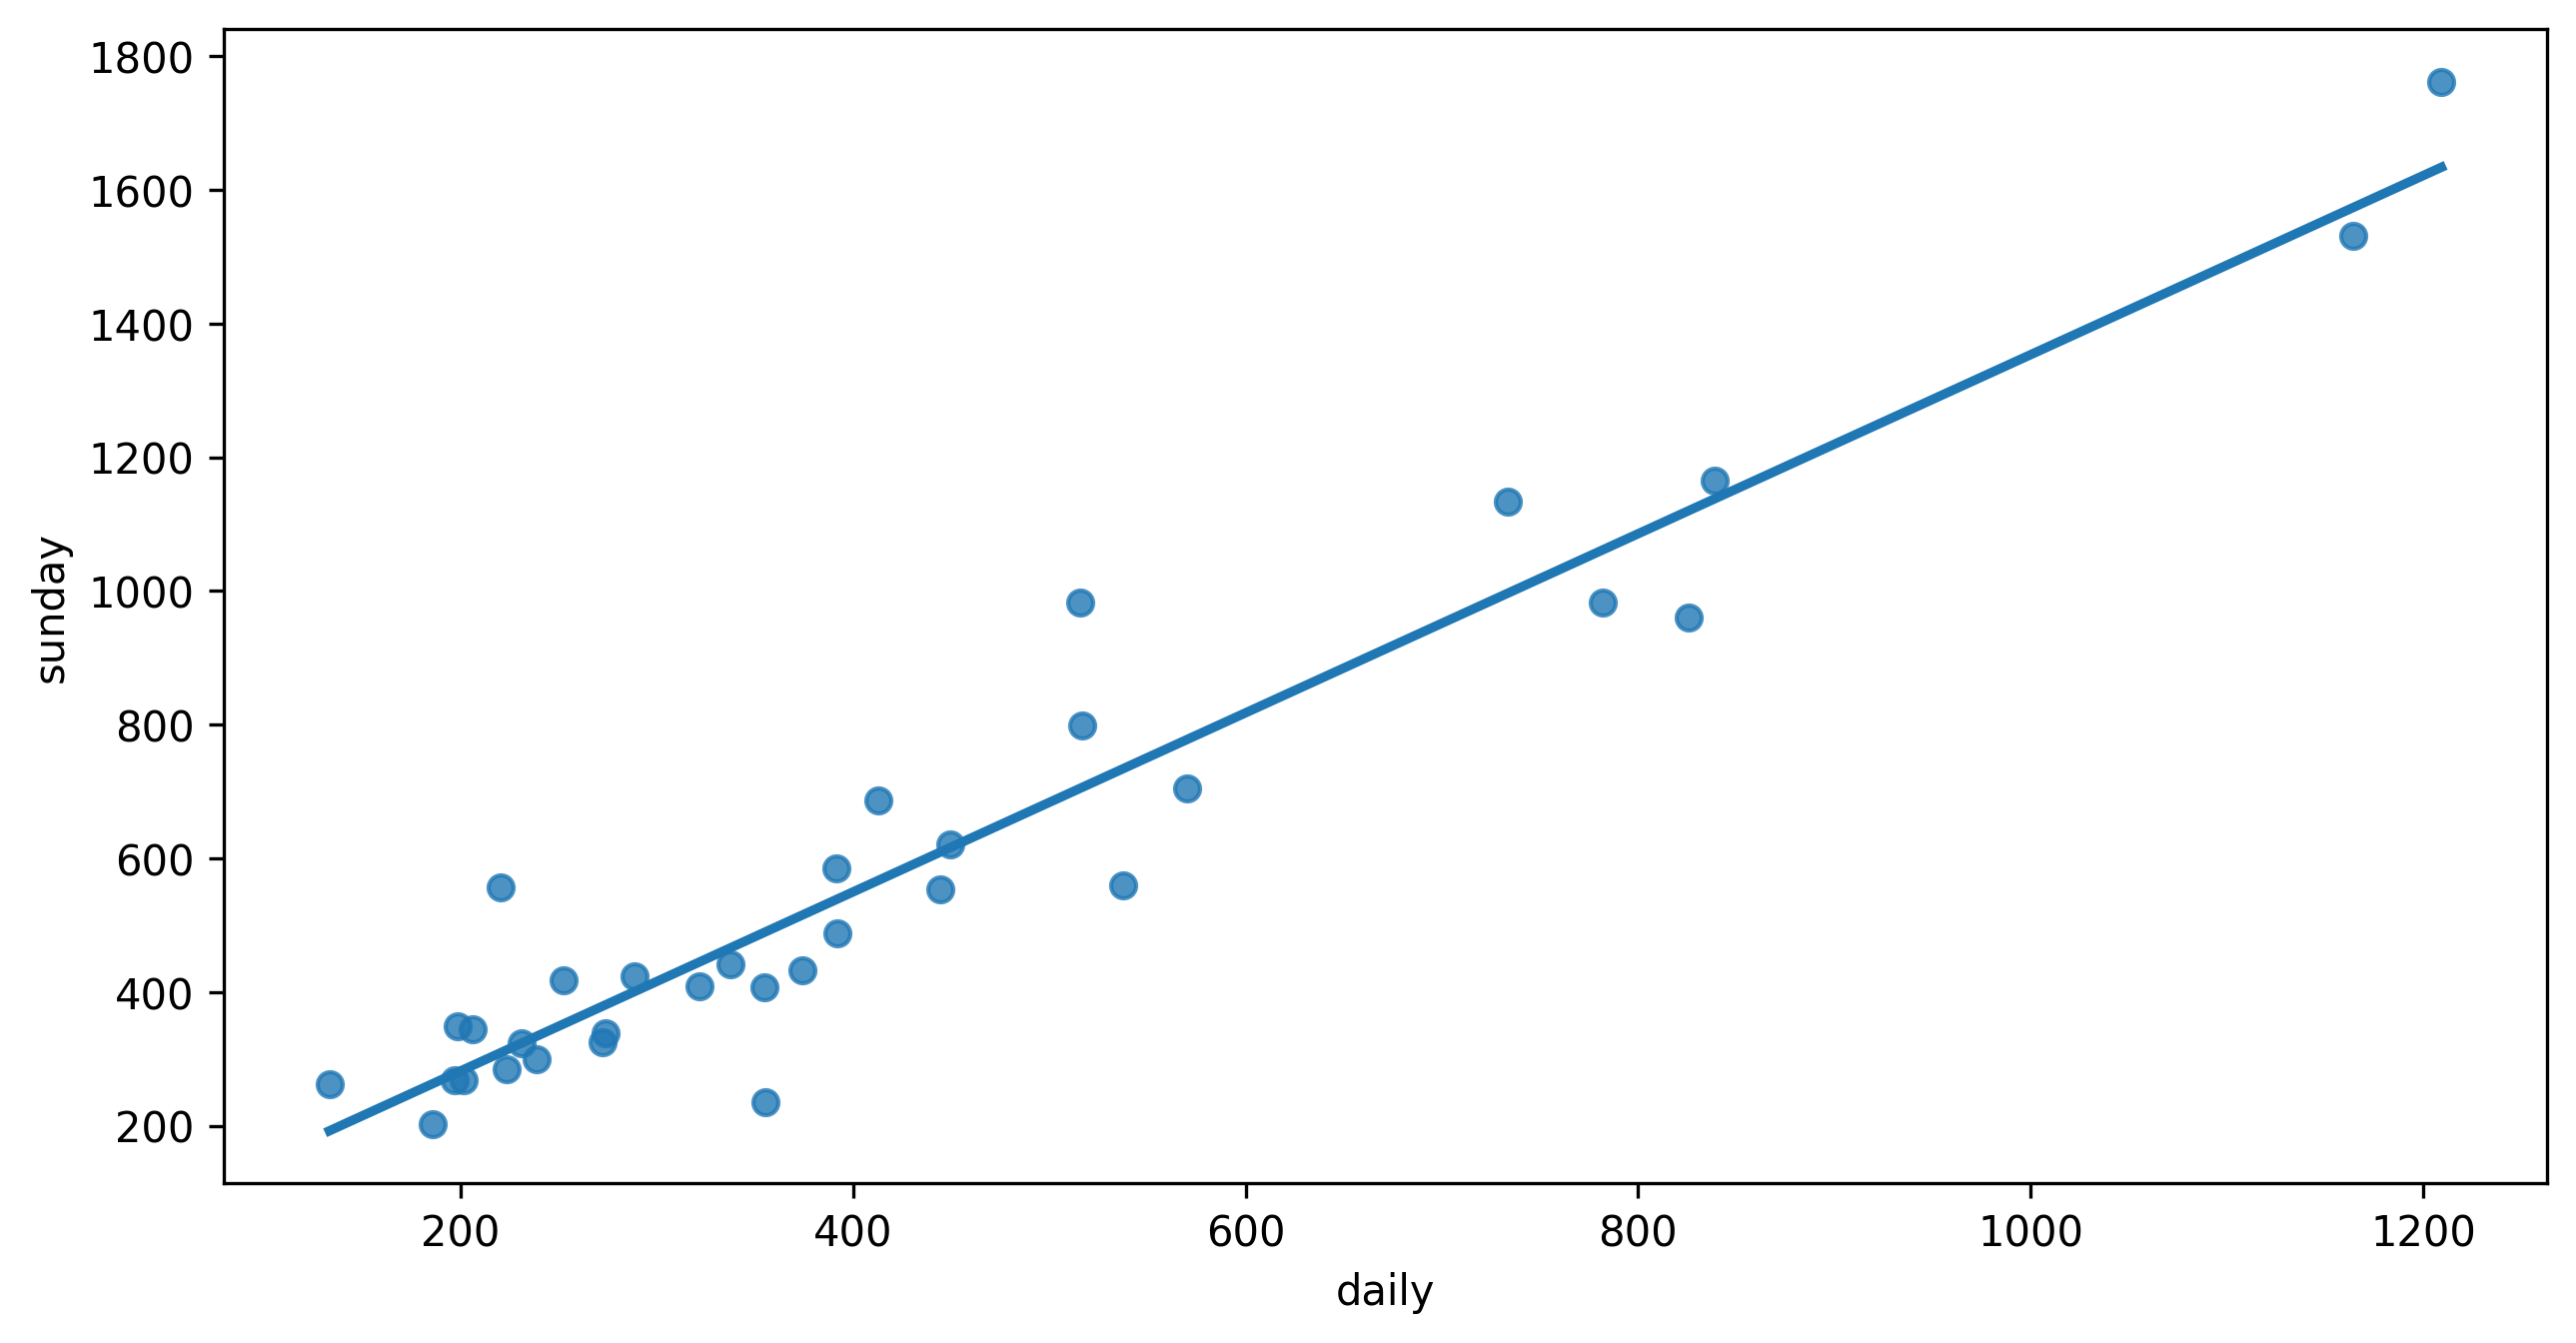

In [13]:
sns.regplot(x="daily",y="sunday",data=nw,ci=None)
# if ci=None is not written it will show shaded part around the line
# it is the size of the confidence interval for the regression estimate
# this will be drawn using transulant bands around the regression line

# **Predict for new data point**

In [15]:
#predict for 200 and 300 daily circulation
# x value is 200 at one branch and 300 at another branch
newdata=pd.Series([200,300])
newdata

,0
0,200
1,300


In [17]:
data_pred=pd.DataFrame(newdata,columns=["daily"])
data_pred

,daily
0,200
1,300


In [19]:
model.predict(data_pred) # model-regression model

,0
0,281.778581
1,415.750057


In [21]:
data_pred2=pd.DataFrame({"daily":[120,450,300,770,980,678]})
data_pred2

,daily
0,120
1,450
2,300
3,770
4,980
5,678


In [22]:
model.predict(data_pred2)

,0
0,174.601401
1,616.707271
2,415.750057
3,1045.415993
4,1326.756092
5,922.162236


# **Data Transformation**

1.   sqrt
2.   log



## **1.Log Transgormation**

In [23]:
nw

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [25]:
# to overcome the effect of outliers perform transformation. Skewed histogram will become approx equal
#log of every column can be taken. it doesn't change the pattern in data but changes the values of differentn data
nw['log_daily']=np.log(nw['daily'])
nw

,daily,sunday,log_daily
0,391.952,488.506,5.971139
1,516.981,798.298,6.248006
2,355.628,235.084,5.873885
3,238.555,299.451,5.474600
4,537.780,559.093,6.287450
5,733.775,1133.249,6.598202
6,198.832,348.744,5.292460
7,252.624,417.779,5.531902
8,206.204,344.522,5.328866
9,231.177,323.084,5.443184


In [26]:
nw['log_sunday']=np.log(nw['sunday'])
nw

,daily,sunday,log_daily,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316
5,733.775,1133.249,6.598202,7.032844
6,198.832,348.744,5.292460,5.854338
7,252.624,417.779,5.531902,6.034953
8,206.204,344.522,5.328866,5.842158
9,231.177,323.084,5.443184,5.777912


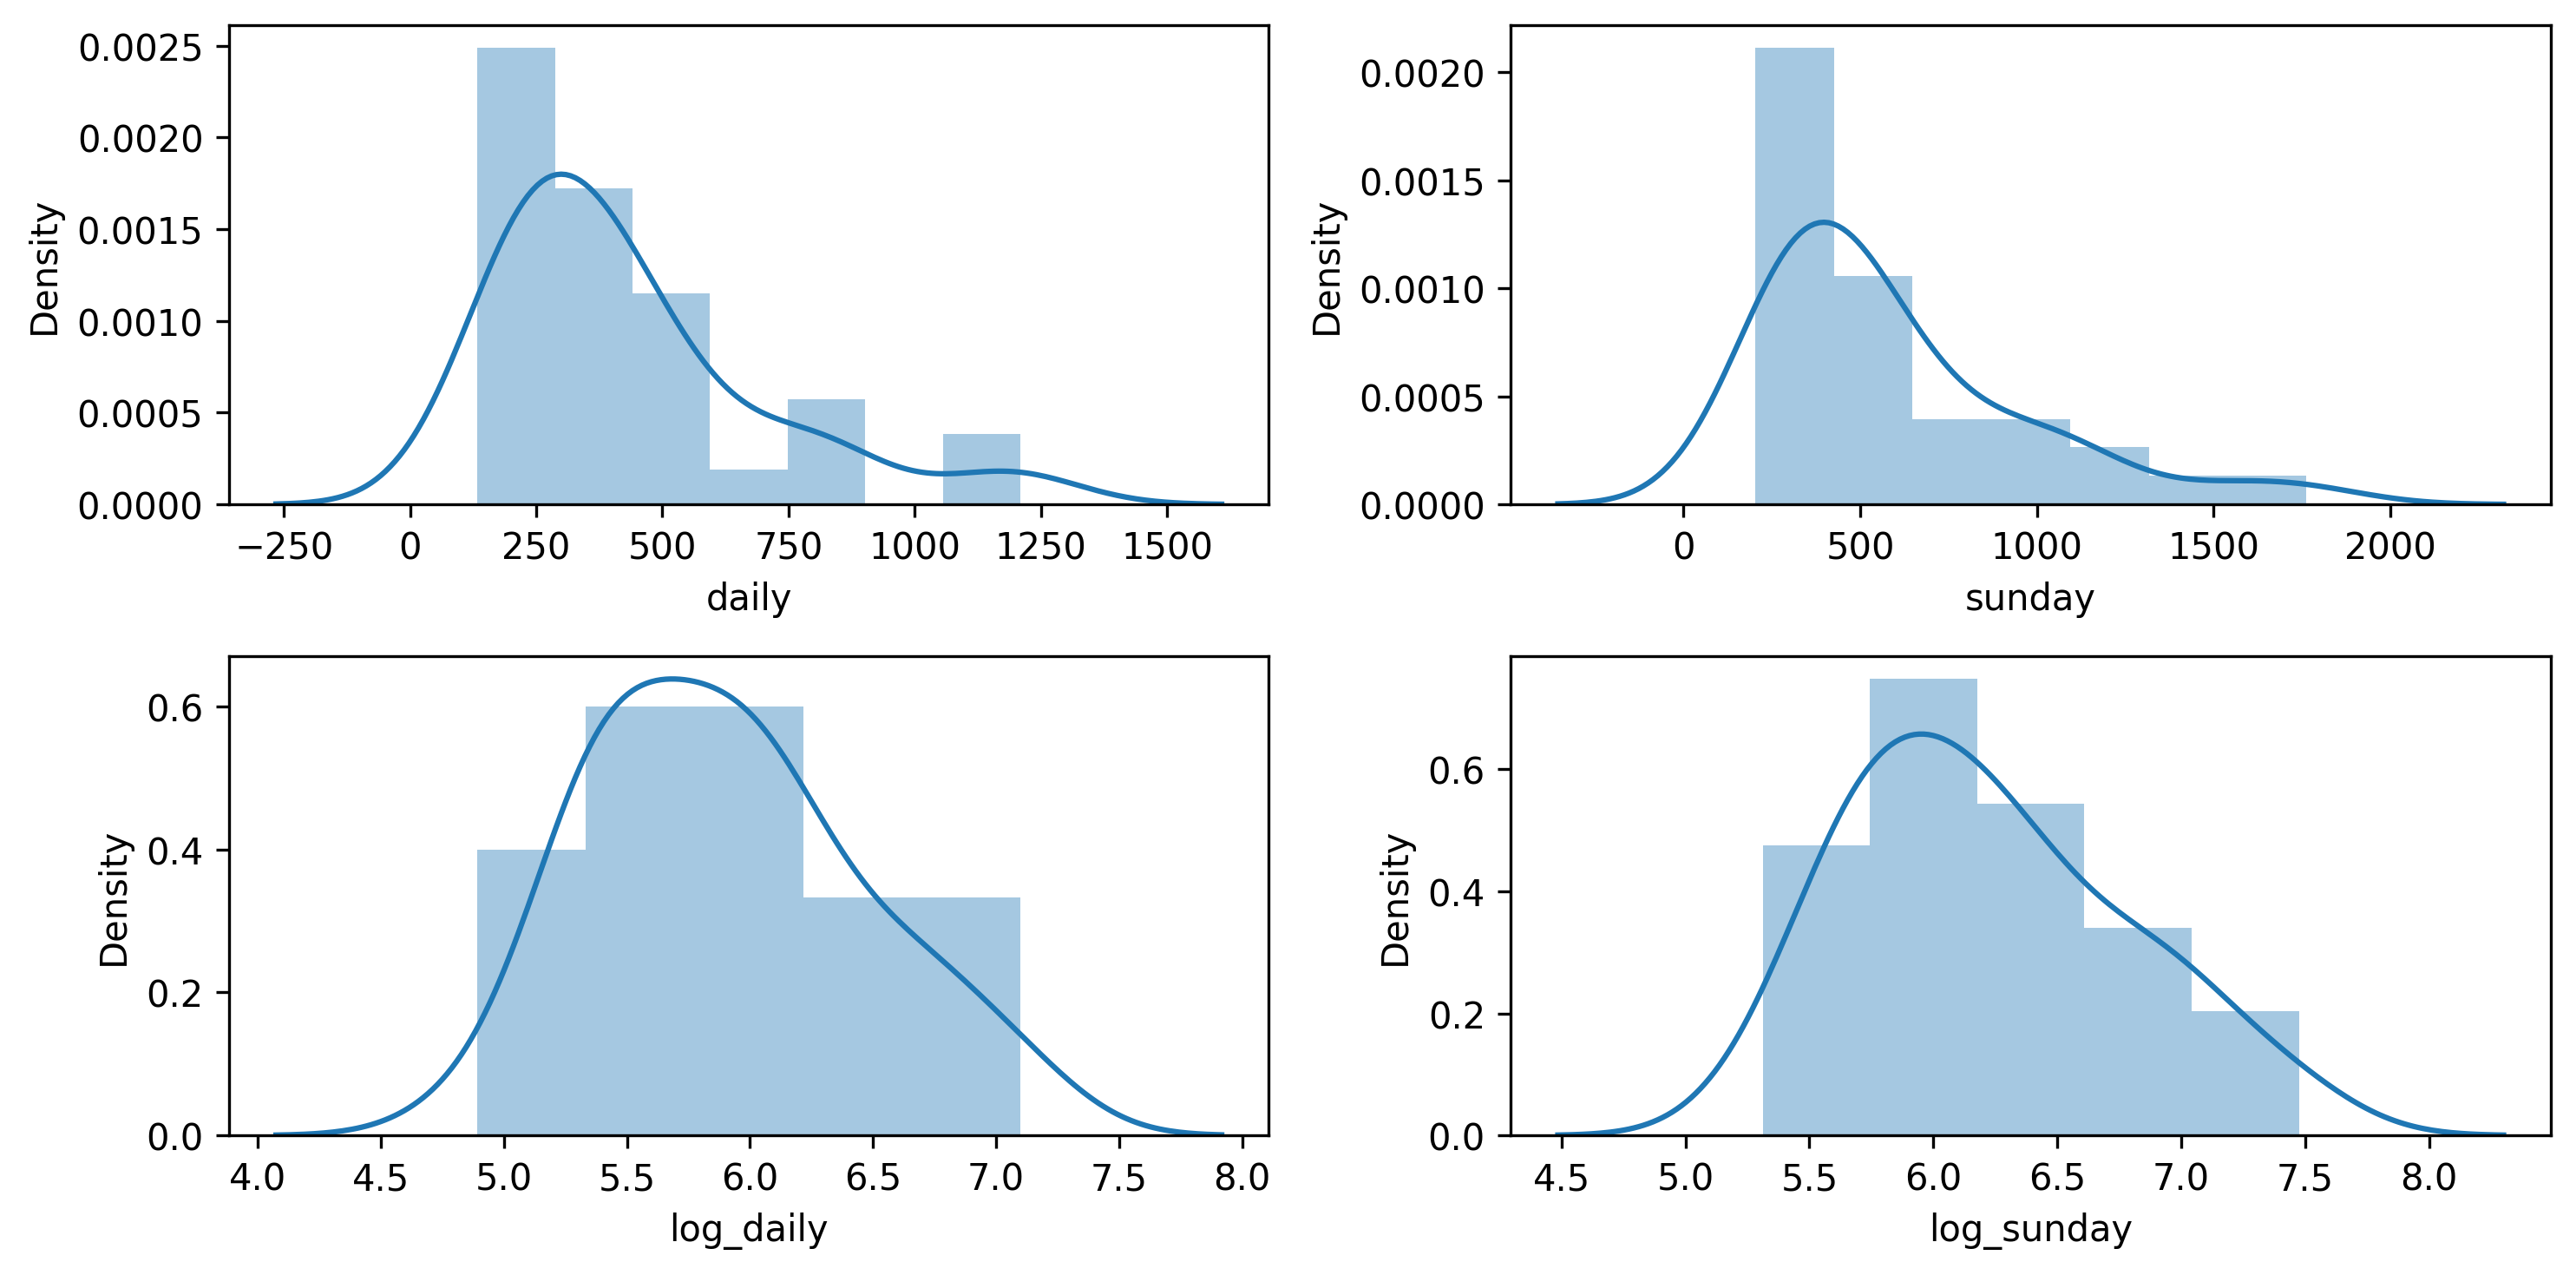

In [28]:
plt.subplot(2,2,1)
sns.distplot(nw['daily'])

plt.subplot(2,2,2)
sns.distplot(nw['sunday'])

plt.subplot(2,2,3)
sns.distplot(nw['log_daily'])

plt.subplot(2,2,4)
sns.distplot(nw['log_sunday'])

plt.tight_layout()

In [29]:
nw['log_daily'].skew(),nw['log_sunday'].skew()
#moderate skewness is there
# To remove all skewness we have to remove all outliers from data

(0.4682202000020356, 0.5337572087816101)

In [30]:
nw['daily'].skew(),nw['sunday'].skew()

(1.5321591323040094, 1.5644730738925112)

# **Sqrt Transformation**

comparitively less effective than log transformation

In [31]:
nw['sqrt_daily']=np.sqrt(nw['daily'])
nw['sqrt_sunday']=np.sqrt(nw['sunday'])
nw

,daily,sunday,log_daily,log_sunday,sqrt_daily,sqrt_sunday
0,391.952,488.506,5.971139,6.191352,19.797778,22.102172
1,516.981,798.298,6.248006,6.682482,22.737216,28.254168
2,355.628,235.084,5.873885,5.459943,18.858102,15.332449
3,238.555,299.451,5.474600,5.701951,15.445226,17.304653
4,537.780,559.093,6.287450,6.326316,23.190084,23.645147
5,733.775,1133.249,6.598202,7.032844,27.088282,33.663764
6,198.832,348.744,5.292460,5.854338,14.100780,18.674689
7,252.624,417.779,5.531902,6.034953,15.894150,20.439643
8,206.204,344.522,5.328866,5.842158,14.359805,18.561304
9,231.177,323.084,5.443184,5.777912,15.204506,17.974538


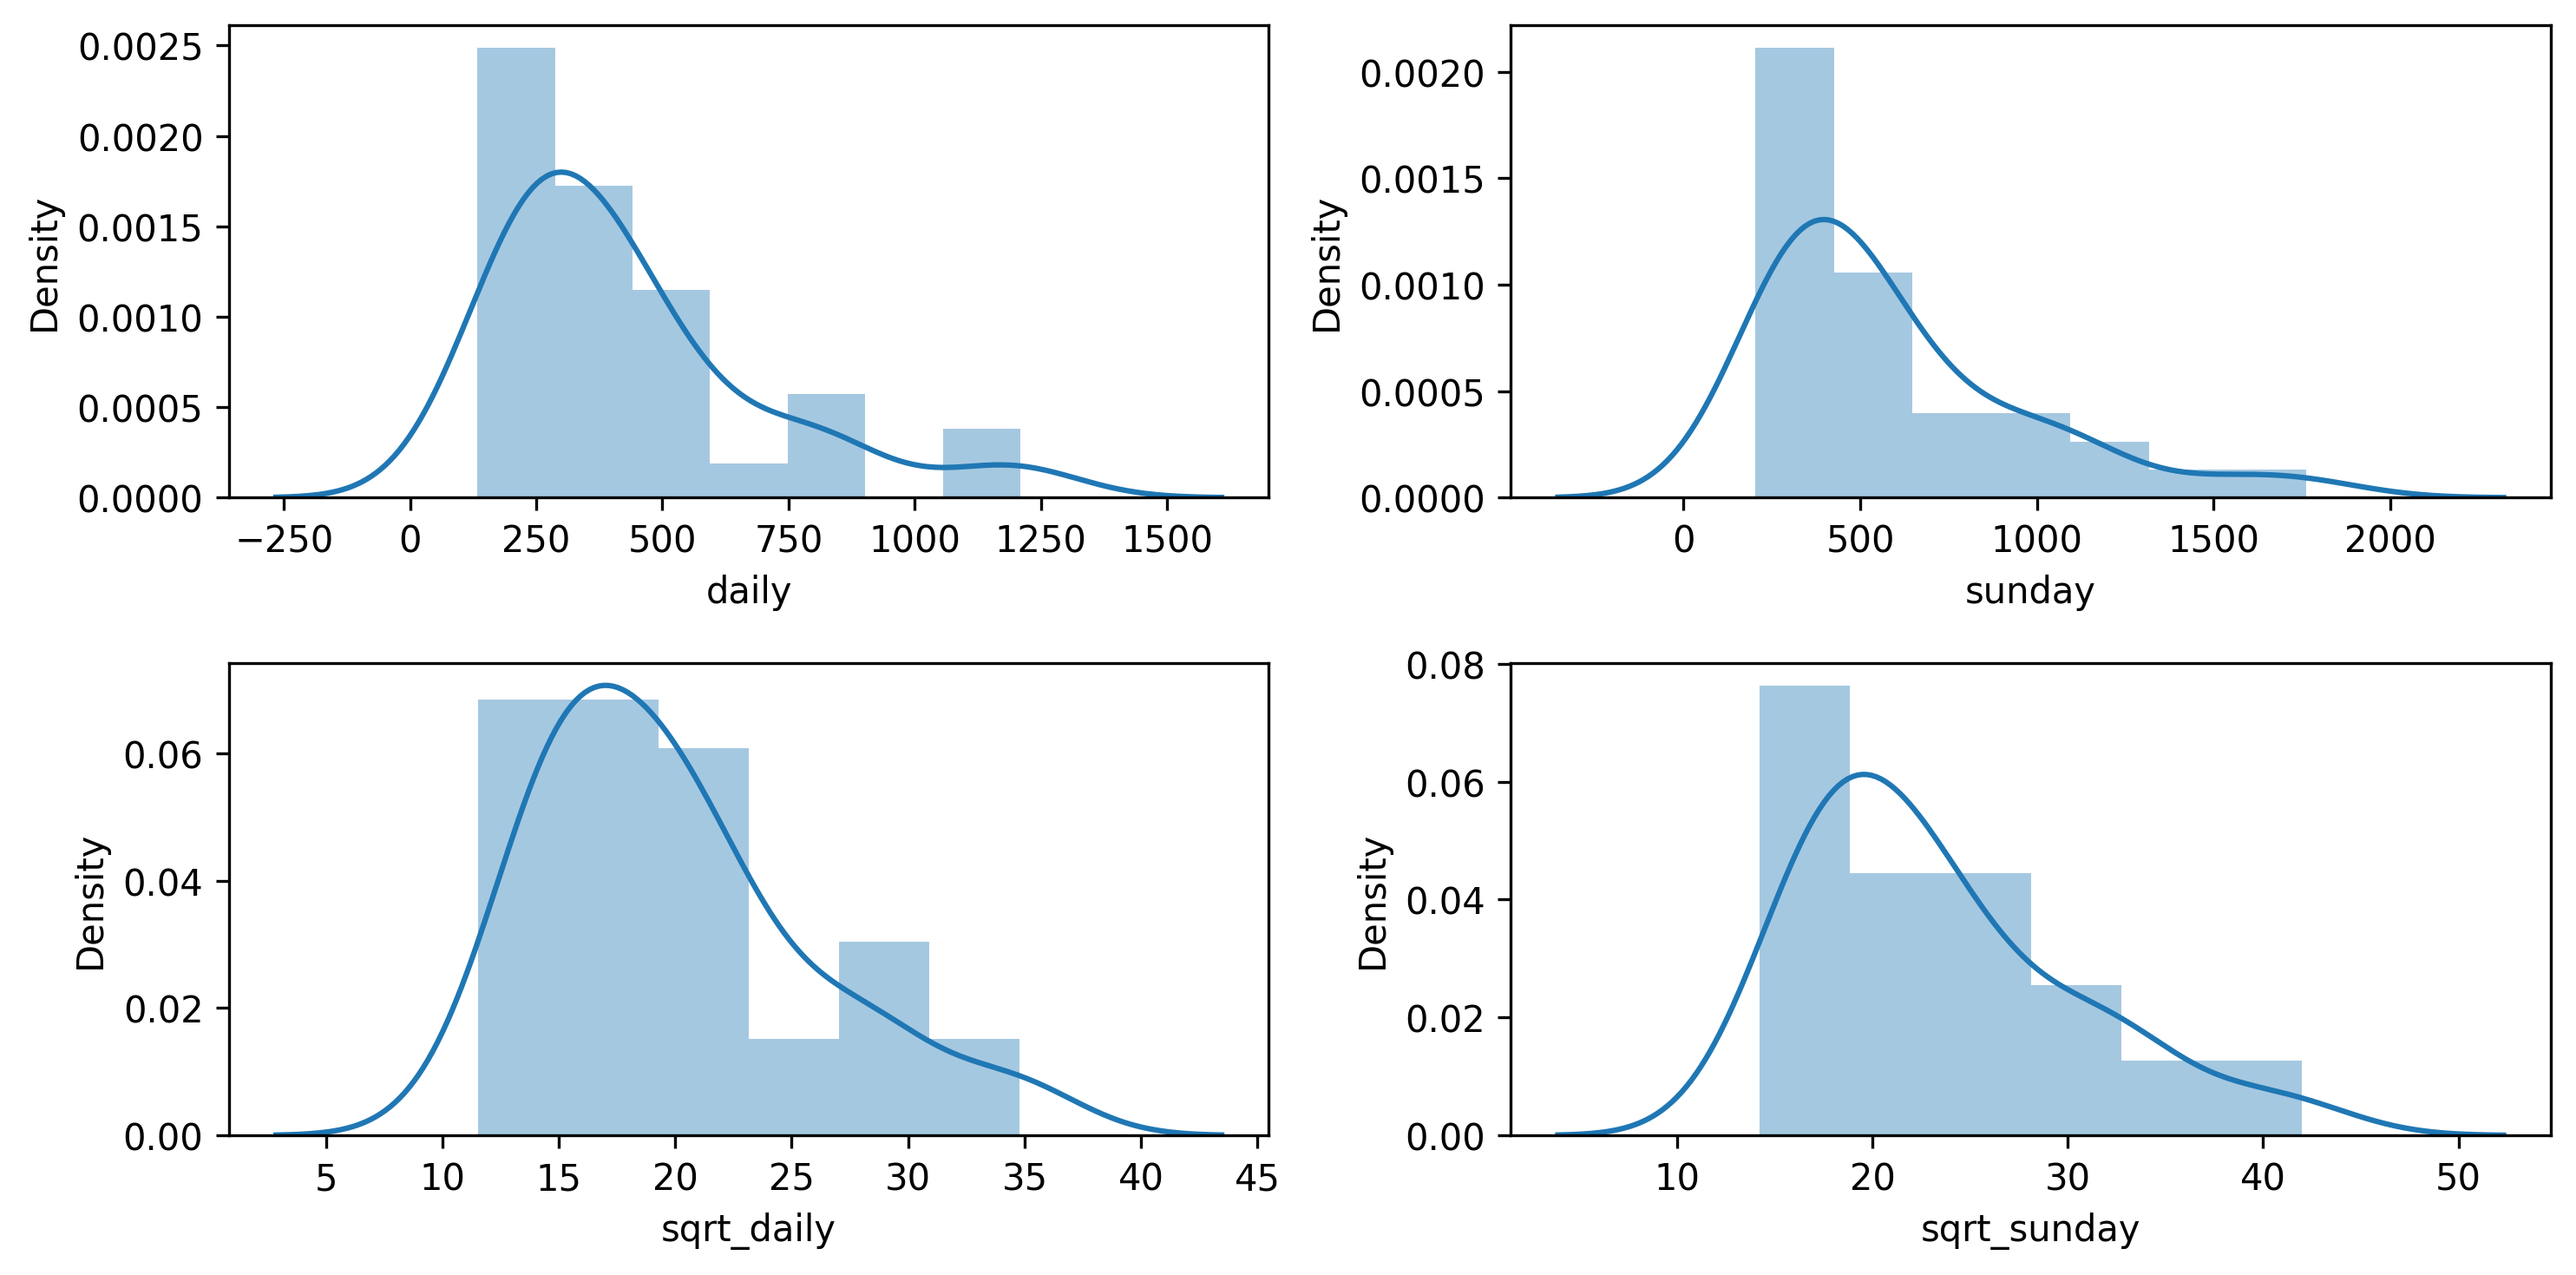

In [32]:
plt.subplot(2,2,1)
sns.distplot(nw['daily'])

plt.subplot(2,2,2)
sns.distplot(nw['sunday'])

plt.subplot(2,2,3)
sns.distplot(nw['sqrt_daily'])

plt.subplot(2,2,4)
sns.distplot(nw['sqrt_sunday'])

plt.tight_layout()

In [33]:
nw['sqrt_daily'].skew(),nw['sqrt_sunday'].skew()

(1.0075247084922163, 1.0392935145699538)

# ** weight cut eg**

In [34]:
wc=pd.read_csv("/content/WC_AT.csv")
wc

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


<Axes: xlabel='Waist', ylabel='AT'>

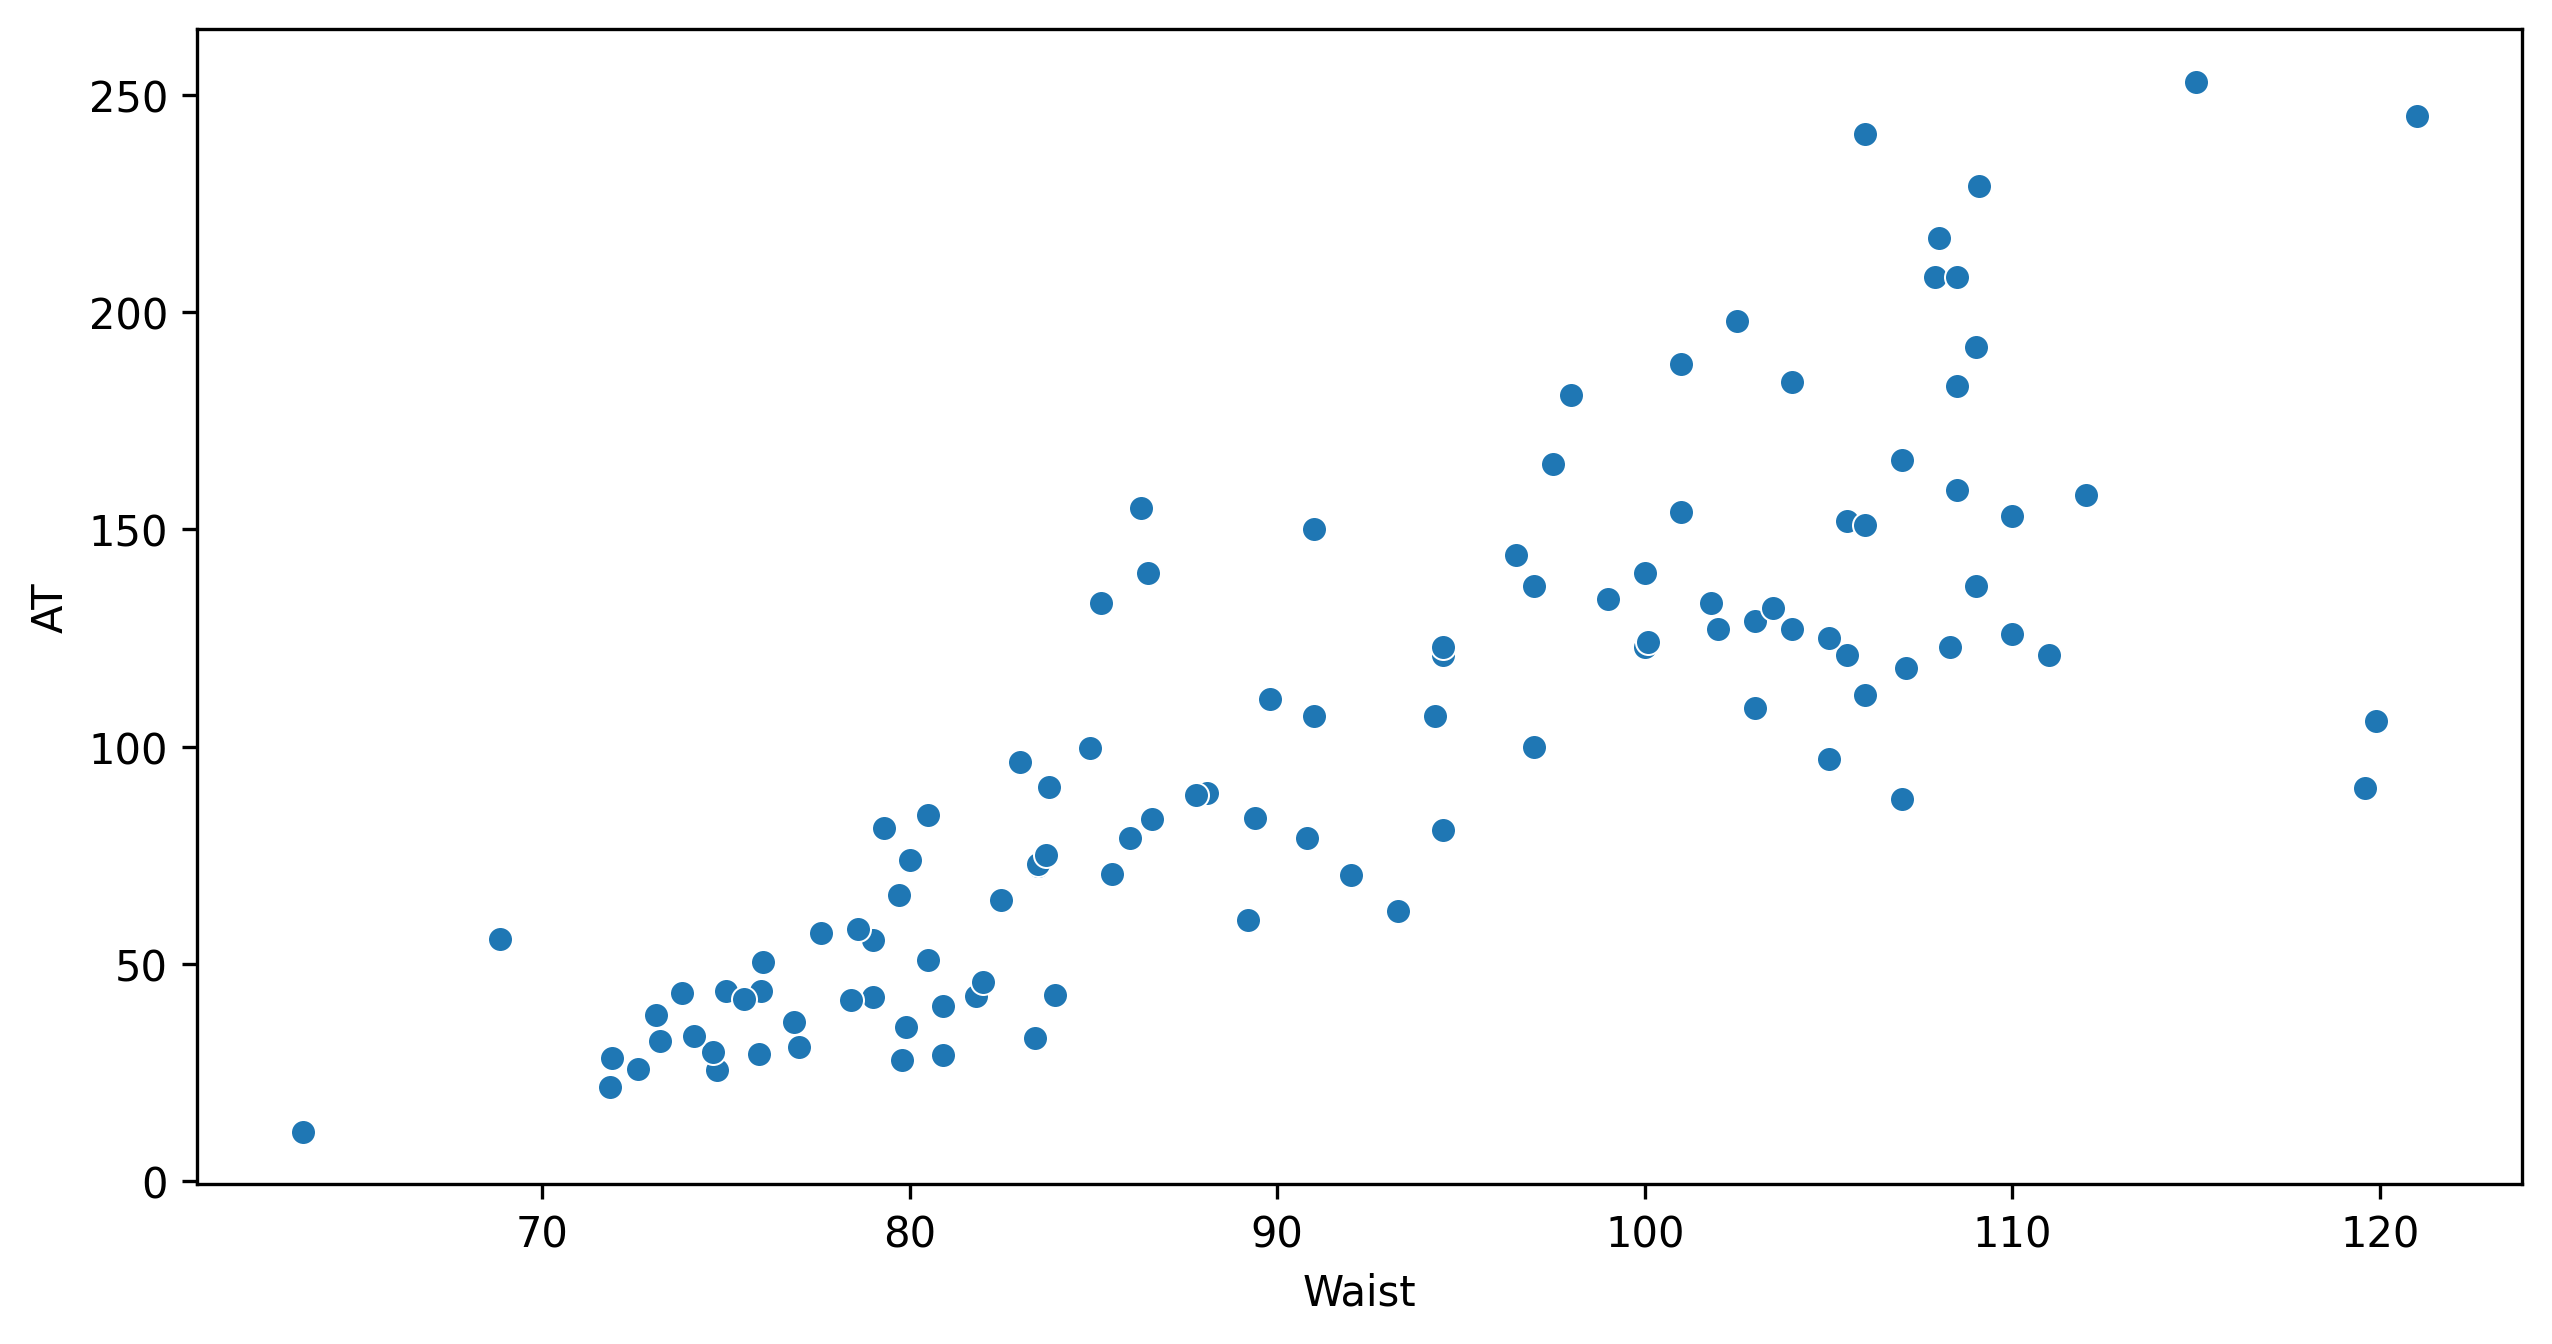

In [35]:
sns.scatterplot(x="Waist",y="AT",data=wc)

In [36]:
wc.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<Axes: >

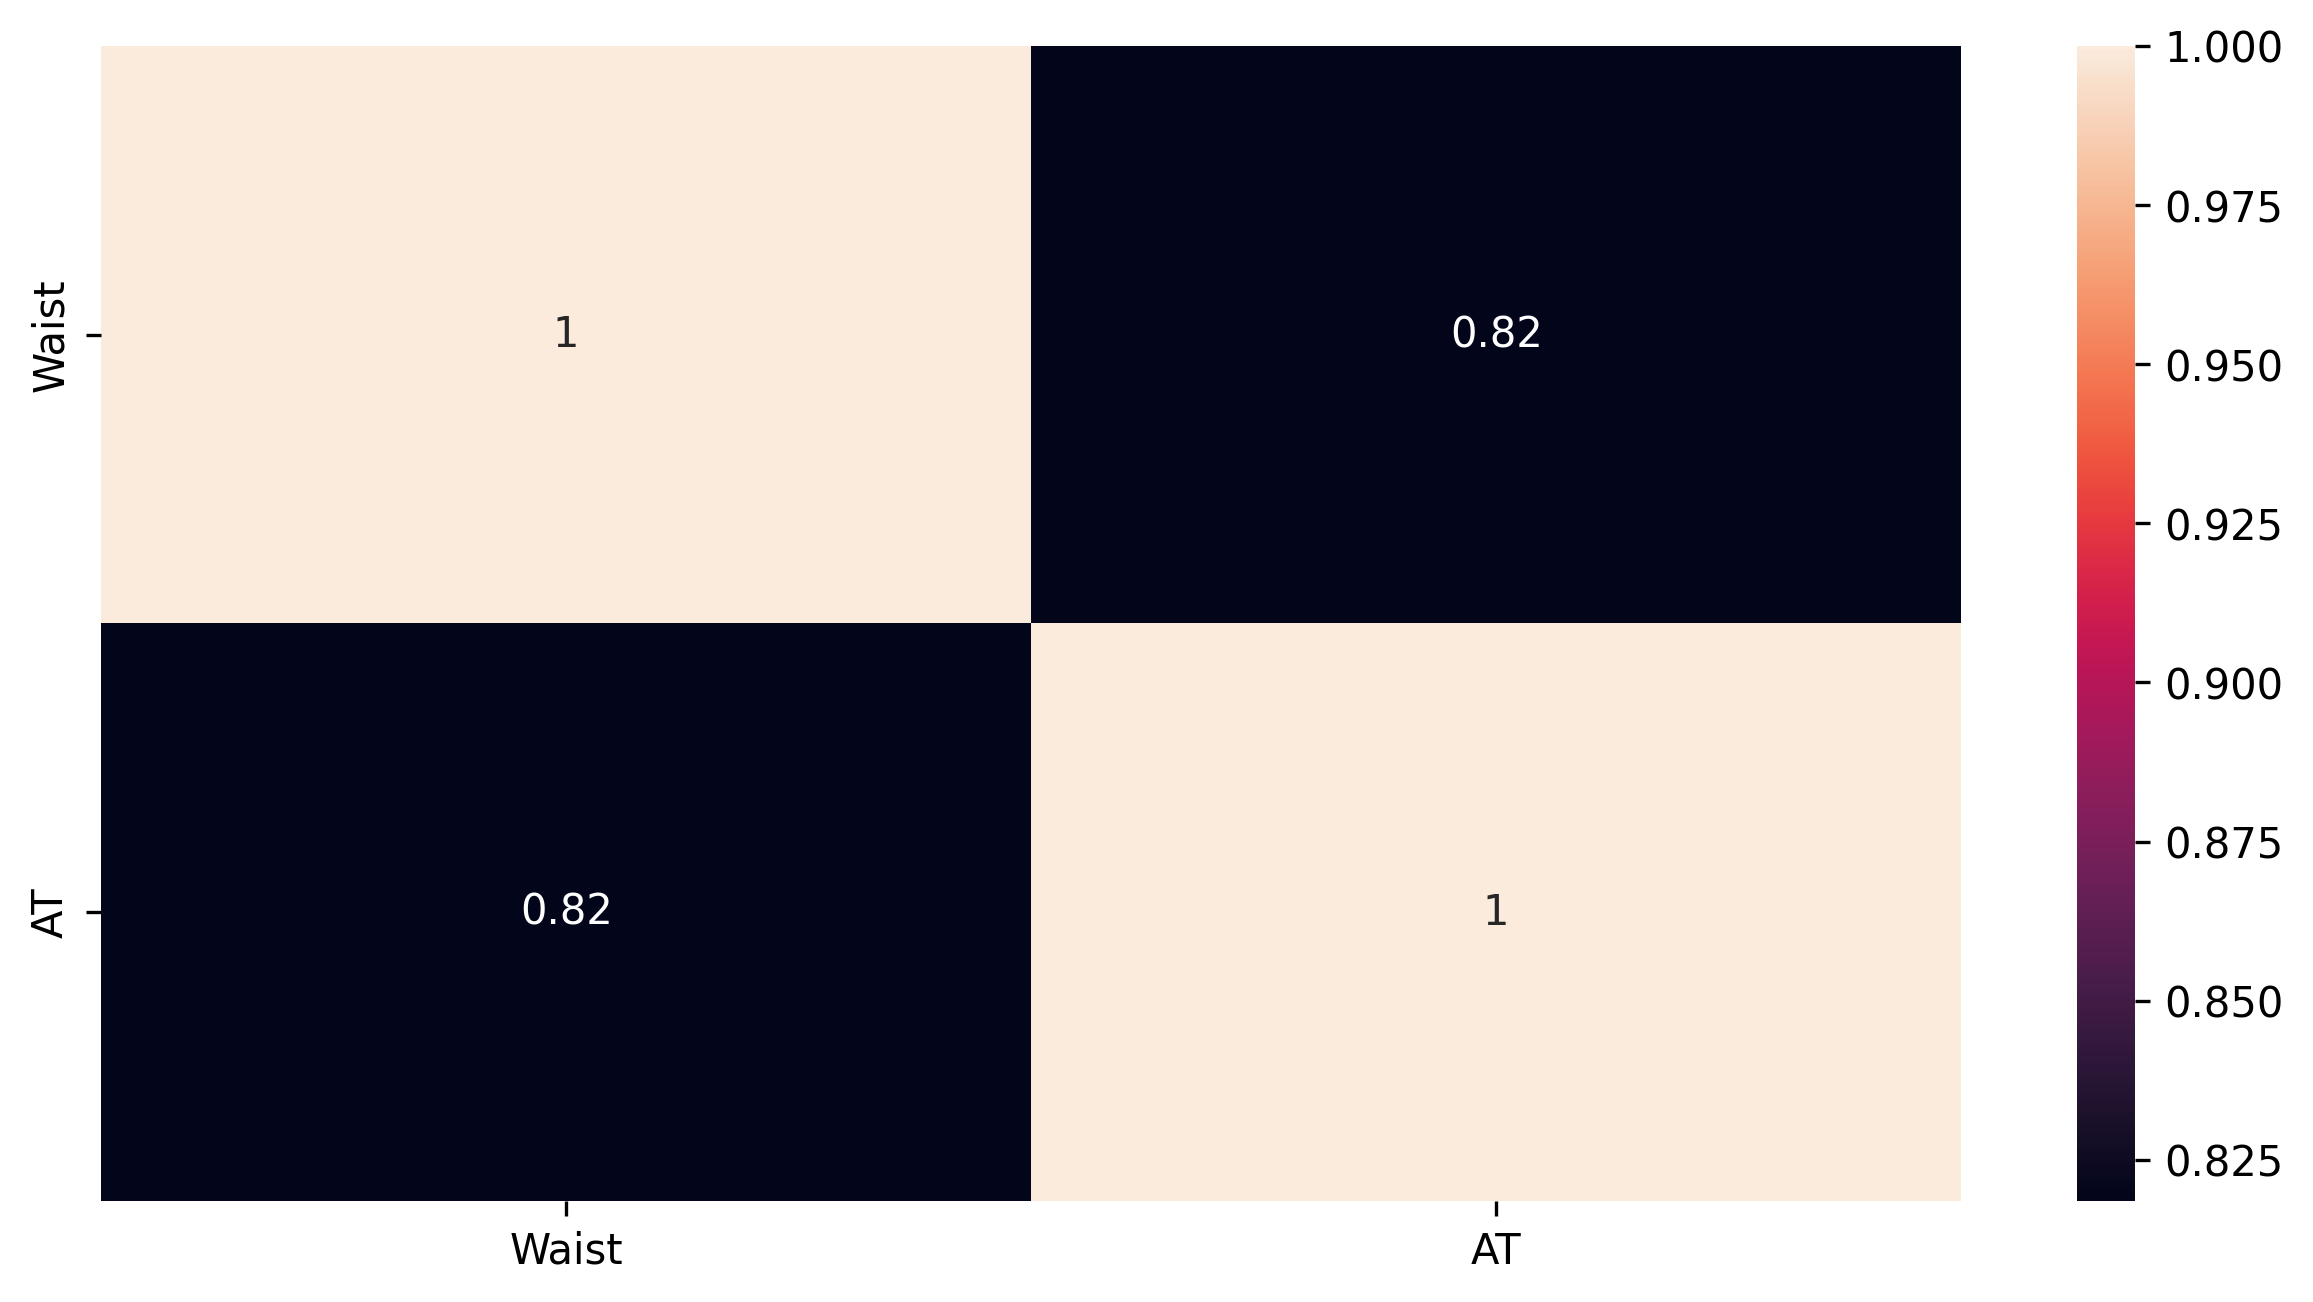

In [37]:
sns.heatmap(wc.corr(),annot=True)

In [44]:
import statsmodels.formula.api as smf
model=smf.ols("AT~Waist",data=wc).fit()

In [45]:
model.params

,0
Intercept,-215.981488
Waist,3.458859


In [46]:
model.rsquared


0.670036893052843

<Axes: xlabel='Waist', ylabel='AT'>

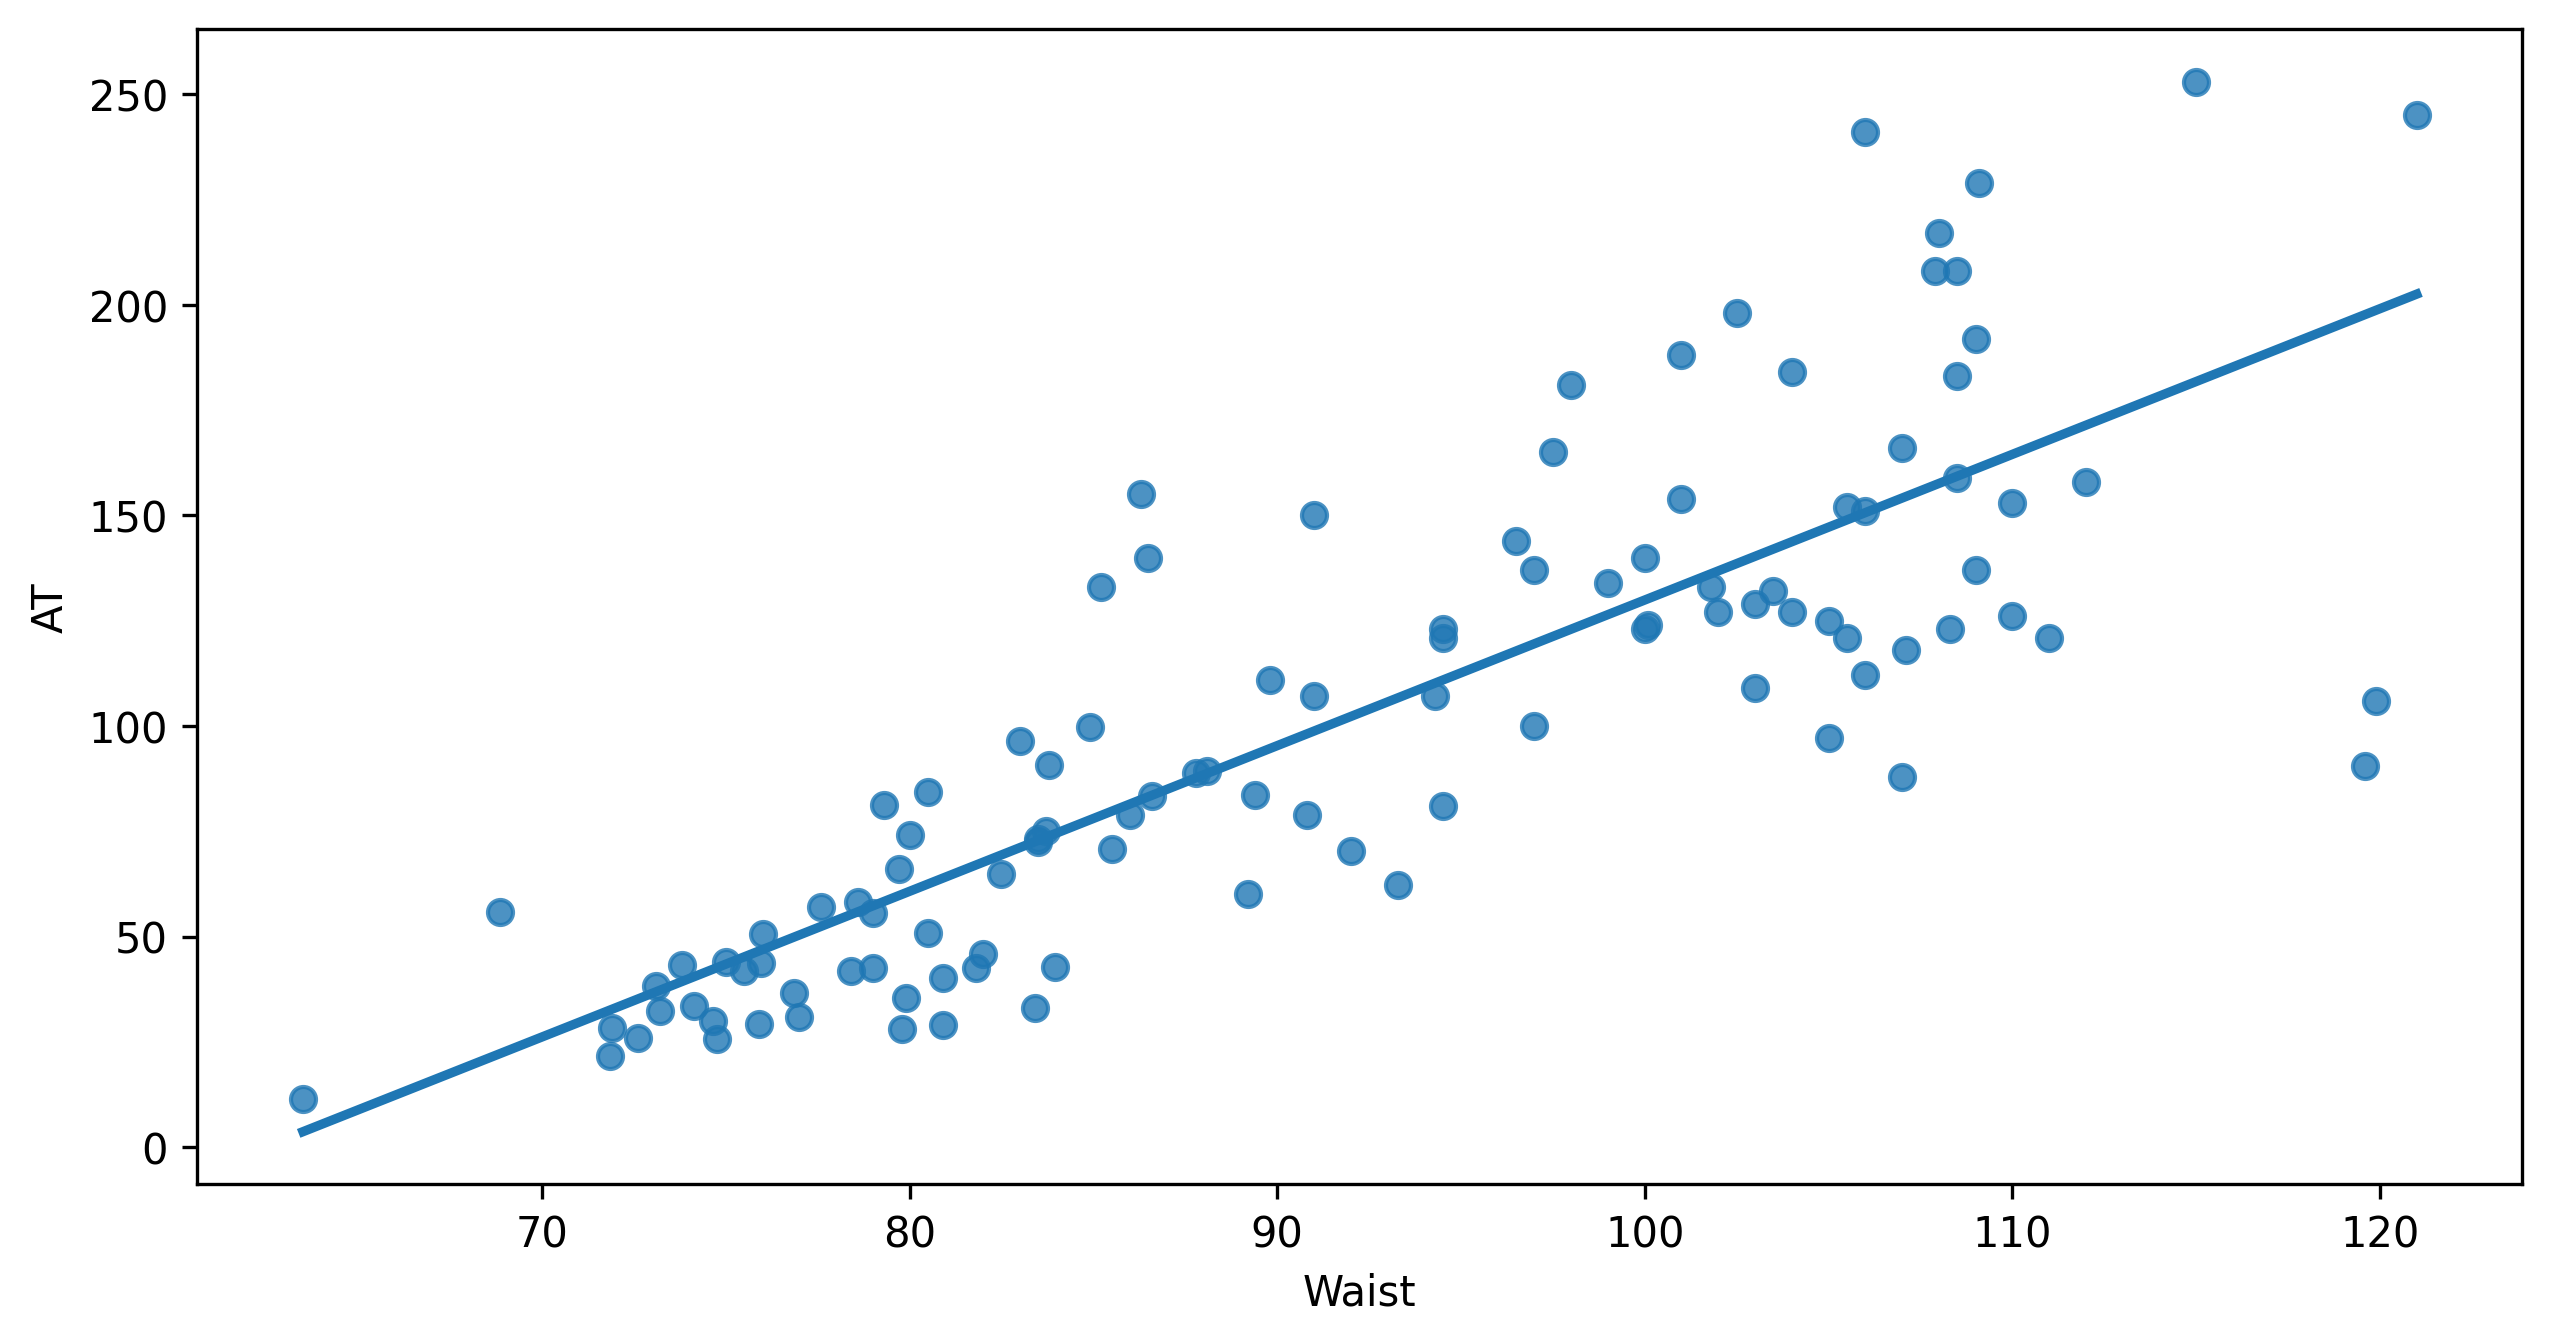

In [50]:
sns.regplot(x="Waist",y="AT",data=wc,ci=None)

In [51]:
data1=pd.Series([100,120,45,56,89,89])
data1

,0
0,100
1,120
2,45
3,56
4,89
5,89


In [52]:
data1=pd.DataFrame(data1,columns=["Waist"])
data1


,Waist
0,100
1,120
2,45
3,56
4,89
5,89


In [53]:
model.predict(data1)

,0
0,129.904451
1,199.081639
2,-60.332815
3,-22.285362
4,91.856998
5,91.856998
